# Support Vector Machine (SVM)

In [16]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn
import math
import random

from sklearn import svm


For each time stamp t, there are B-field values, velocity values, density, and temperature values. If these data points fall within specific values, then they are 


position: magnetosheath The Earth's magnetosheath typically occupies the region of space approximately 10 Earth radii on the upwind (Sun-facing) side of the planet, extending significantly farther out on the downwind side due to the pressure of the solar wind. (https://www.britannica.com/science/magnetosheath)



+x GSE values = dayside
-x GSE values = nightside 


In [17]:
# Load density data

MMS2_n = pd.read_csv('MMS2_n.csv',
                     header = 0,names = ['times','n','date'],
                     parse_dates=['date'])


# load temperature data
MMS2_Tperp = pd.read_csv('MMS2_Tperp.csv',
                     header = 0,names = ['times','Tperp','date'],
                     parse_dates=['date'])

MMS2_Tpara = pd.read_csv('MMS2_Tpara.csv',
                     header = 0,names = ['times','Tpara','date'],
                     parse_dates=['date'])


MMS2_n

,times,n,date
0,1.592421e+09,0.384797,2020-06-17 19:17:13.094996992
1,1.592421e+09,0.390098,2020-06-17 19:17:13.244997120
2,1.592421e+09,0.400450,2020-06-17 19:17:13.394996992
3,1.592421e+09,0.377668,2020-06-17 19:17:13.544997120
4,1.592421e+09,0.395304,2020-06-17 19:17:13.694996992
...,...,...,...
134580,1.592452e+09,13.960220,2020-06-18 03:41:32.274036992
134581,1.592452e+09,13.939400,2020-06-18 03:41:32.424037120
134582,1.592452e+09,14.419994,2020-06-18 03:41:32.574036992
134583,1.592452e+09,14.073477,2020-06-18 03:41:32.724037120


In [18]:
# Magnteosphere time periods were identified by eye. 
# Find matching indices to classify density data set into being either 1 magnetosphere, or 0 not magnetosphere


# Identified magnetosphere time periods





DT_st_time = '2020-06-17/20:30:00'
DT_end_time = '2020-06-17/23:00:53'

DT_st_idx = MMS2_n.date.searchsorted(DT_st_time)
DT_end_idx = MMS2_n.date.searchsorted(DT_end_time)
print(DT_st_idx)
print(DT_end_idx)




DT_st_time_2 = '2020-06-17/23:22:14'
DT_end_time_2 = '2020-06-17/23:50:21'

DT_st_idx_2 = MMS2_n.date.searchsorted(DT_st_time_2)
DT_end_idx_2 = MMS2_n.date.searchsorted(DT_end_time_2)
print(DT_st_idx_2)
print(DT_end_idx_2)


645
60995
69534
80781


In [19]:



# create an array the length of the classified data, fill with 0's
MSP = np.zeros(len(MMS2_n.date))






Magnetosphere_st_stop_times = ['2020-06-17/20:30:00','2020-06-17/21:16:31',
'2020-06-17/21:32:41','2020-06-17/21:35:30',
'2020-06-17/21:38:54','2020-06-17/21:41:40', 
'2020-06-17/21:49:00','2020-06-17/21:53:39',
'2020-06-17/21:56:49','2020-06-17/22:00:36',
'2020-06-17/22:04:52','2020-06-17/22:10:44',
'2020-06-17/22:13:28', '2020-06-17/22:16:47',
'2020-06-17/22:20:06','2020-06-17/22:23:55',
'2020-06-17/22:27:45','2020-06-17/22:30:56',
'2020-06-17/22:34:34','2020-06-17/22:37:37',
'2020-06-17/22:39:17','2020-06-17/22:43:45',
'2020-06-17/22:46:41','2020-06-17/22:49:33',
'2020-06-17/22:55:59','2020-06-17/23:00:53']







alternate_MSP_st_stop_times = ['2020-06-17/23:22:14','2020-06-17/23:27:59',
'2020-06-17/23:30:14','2020-06-17/23:37:17',
'2020-06-17/23:41:27','2020-06-17/23:43:23', 
'2020-06-17/23:46:16','2020-06-17/23:50:21']

# too lazy to reformat the original list, so specify that start times are every other 
# element starting at 0th index, end times are every other index starting at 1st index

st_times = Magnetosphere_st_stop_times[::2]
end_times = Magnetosphere_st_stop_times[1::2]

for t in range(len(st_times)):
    st_idx_1 = MMS2_n.date.searchsorted(st_times[t])
    print('start index:',st_idx_1)
    end_idx_1 = MMS2_n.date.searchsorted(end_times[t])
    print('end index:',end_idx_1)
    MSP[st_idx_1:end_idx_1] = 1
    print('\n')
    

# create an array the length of the classified data, fill with 0's
MSP_2 = np.zeros(len(MMS2_n.date))  
st_times_2 = alternate_MSP_st_stop_times[::2]
end_times_2 = alternate_MSP_st_stop_times[1::2]

for t in range(len(st_times_2)):
    st_idx_1 = MMS2_n.date.searchsorted(st_times_2[t])
    print('start index:',st_idx_1)
    end_idx_1 = MMS2_n.date.searchsorted(end_times_2[t])
    print('end index:',end_idx_1)
    MSP[st_idx_1:end_idx_1] = 1
    print('\n')
    

# save to a .csv so I can visually inspect the result
#pd.DataFrame(MSP_2).to_csv('MSP_classifier_alternate.csv', index=False) 


start index: 645
end index: 19251


start index: 25718
end index: 26844


start index: 28204
end index: 29311


start index: 32244
end index: 34104


start index: 35371
end index: 36884


start index: 38591
end index: 40938


start index: 42031
end index: 43358


start index: 44683
end index: 46210


start index: 47743
end index: 49016


start index: 50470
end index: 51690


start index: 52356
end index: 54143


start index: 55316
end index: 56463


start index: 59035
end index: 60995


start index: 69534
end index: 71834


start index: 72734
end index: 75554


start index: 77221
end index: 77994


start index: 79147
end index: 80781




In [20]:
#DT_n_DF = MMS2_n.iloc[DT_st_idx:DT_end_idx]


n = np.array(MMS2_n.n[DT_st_idx:DT_end_idx])

n_2 = np.array(MMS2_n.n[DT_st_idx_2:DT_end_idx_2])

#print(n)

# DT_n_DF['MSP_classifier'] = MSP[DT_st_idx:DT_end_idx]

DT_DF = pd.DataFrame(data = {"times": MMS2_n.times[DT_st_idx:DT_end_idx],
                             "n": MMS2_n.n[DT_st_idx:DT_end_idx],
                             "Tpara": MMS2_Tpara.Tpara[DT_st_idx:DT_end_idx],
                            "Tperp": MMS2_Tperp.Tperp[DT_st_idx:DT_end_idx],
                            "MSP":MSP[DT_st_idx:DT_end_idx]})



DT_DF_2 = pd.DataFrame(data = {"times": MMS2_n.times[DT_st_idx_2:DT_end_idx_2],
                             "n": MMS2_n.n[DT_st_idx_2:DT_end_idx_2],
                             "Tpara": MMS2_Tpara.Tpara[DT_st_idx_2:DT_end_idx_2],
                            "Tperp": MMS2_Tperp.Tperp[DT_st_idx_2:DT_end_idx_2],
                            "MSP":MSP[DT_st_idx_2:DT_end_idx_2]})


# DT_DF = pd.DataFrame(data = {"times": MMS2_n.times[DT_st_idx:DT_end_idx],
#                              "n": MMS2_n.n[DT_st_idx:DT_end_idx],"MSP":MSP[DT_st_idx:DT_end_idx]})



# DT_DF_2 = pd.DataFrame(data = {"times": MMS2_n.times[DT_st_idx_2:DT_end_idx_2],
#                              "n": MMS2_n.n[DT_st_idx_2:DT_end_idx_2],
#                             "MSP":MSP[DT_st_idx_2:DT_end_idx_2]})

In [21]:
# X = DT_DF.drop(['MSP'], axis=1)
# y = DT_DF['MSP']


# X_2 = DT_DF_2.drop(['MSP'], axis=1)
# y_2 = DT_DF_2['MSP']

X = DT_DF.drop(['MSP'], axis=1)
y = DT_DF['MSP']


X_2 = DT_DF_2.drop(['MSP'], axis=1)
y_2 = DT_DF_2['MSP']




In [22]:
# split X and y into training and testing sets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# train on 70% of data, test on 30%
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 0)




X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_2,y_2, test_size = 0.3, random_state = 0)




# have to use MinMax because I was getting errors for having negative numbers
scaler = MinMaxScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


X_2 = scaler.transform(X_2)

X_train_2 = scaler.fit_transform(X_train_2)
X_test_2 = scaler.transform(X_test_2)





# Create new data frames from the scaled data
X_train = pd.DataFrame(X_train, columns = ['times','n','Tpara','Tperp'])
X_test = pd.DataFrame(X_test, columns = ['times','n','Tpara','Tperp'])

# make sure it looks right
X_train.head()

X_train_2 = pd.DataFrame(X_train_2, columns = ['times','n','Tpara','Tperp'])
X_test_2 = pd.DataFrame(X_test_2, columns = ['times','n','Tpara','Tperp'])




from sklearn import svm
#create a classifier
cls = svm.SVC(kernel="linear")
#train the model
cls.fit(X_train,y_train)
#predict the response
pred = cls.predict(X_test)

In [23]:
from sklearn import metrics
#accuracy
print("acuracy:", metrics.accuracy_score(y_test,y_pred=pred))
#precision score
print("precision:", metrics.precision_score(y_test,y_pred=pred))
#recall score
print("recall" , metrics.recall_score(y_test,y_pred=pred))
print(metrics.classification_report(y_test, y_pred=pred))


acuracy: 0.8396023198011598
precision: 0.8278905560458959
recall 0.9314796425024826
              precision    recall  f1-score   support

         0.0       0.87      0.69      0.77      7028
         1.0       0.83      0.93      0.88     11077

    accuracy                           0.84     18105
   macro avg       0.85      0.81      0.82     18105
weighted avg       0.84      0.84      0.84     18105



In [24]:
# Confusion matrix for entropy DT

from sklearn.metrics import confusion_matrix

CM_svm = confusion_matrix(y_test, pred)

print('Confusion matrix\n\n', CM_svm)

print('\nTrue Positives(TP) = ', CM_svm[0,0])

print('\nTrue Negatives(TN) = ', CM_svm[1,1])

print('\nFalse Positives(FP) = ', CM_svm[0,1])

print('\nFalse Negatives(FN) = ', CM_svm[1,0])

Confusion matrix

 [[ 4883  2145]
 [  759 10318]]

True Positives(TP) =  4883

True Negatives(TN) =  10318

False Positives(FP) =  2145

False Negatives(FN) =  759


<Axes: >

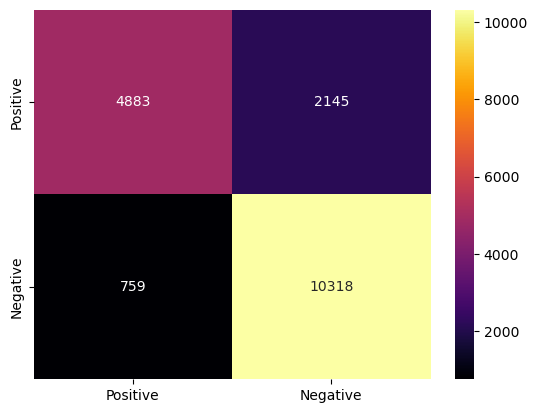

In [25]:
import seaborn as sns # for statistical data visualization

CM_svm_df = pd.DataFrame(data = CM_svm, columns=['Positive', 'Negative'], 
                                 index=['Positive', 'Negative'])

sns.heatmap(CM_svm_df, annot = True, fmt='d', cmap='inferno')

acuracy: 0.9098591549295775
precision: 0.9378766805748725
recall 0.9131533808792994
              precision    recall  f1-score   support

         0.0       0.87      0.90      0.89      7028
         1.0       0.94      0.91      0.93     11077

    accuracy                           0.91     18105
   macro avg       0.90      0.91      0.91     18105
weighted avg       0.91      0.91      0.91     18105

Confusion matrix

 [[ 6358   670]
 [  962 10115]]

True Positives(TP) =  6358

True Negatives(TN) =  10115

False Positives(FP) =  670

False Negatives(FN) =  962


<Axes: >

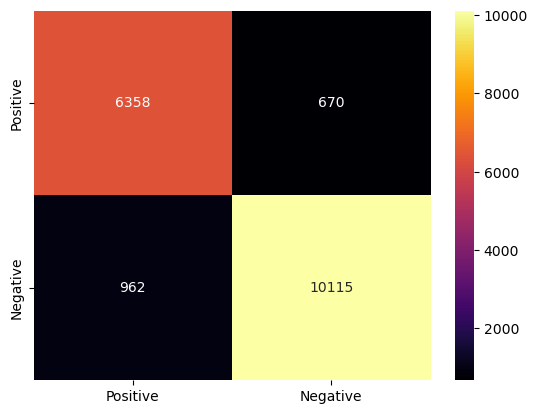

In [26]:
#create a classifier
cls_rbf = svm.SVC(kernel="rbf")
#train the model
cls_rbf.fit(X_train,y_train)
#predict the response
pred_rbf = cls_rbf.predict(X_test)


print("acuracy:", metrics.accuracy_score(y_test,y_pred=pred_rbf))
#precision score
print("precision:", metrics.precision_score(y_test,y_pred=pred_rbf))
#recall score
print("recall" , metrics.recall_score(y_test,y_pred=pred_rbf))
print(metrics.classification_report(y_test, y_pred=pred_rbf))
CM_rbf = confusion_matrix(y_test, pred_rbf)

print('Confusion matrix\n\n', CM_rbf)

print('\nTrue Positives(TP) = ', CM_rbf[0,0])

print('\nTrue Negatives(TN) = ', CM_rbf[1,1])

print('\nFalse Positives(FP) = ', CM_rbf[0,1])

print('\nFalse Negatives(FN) = ', CM_rbf[1,0])

CM_rbf_df = pd.DataFrame(data = CM_rbf, columns=['Positive', 'Negative'], 
                                 index=['Positive', 'Negative'])

sns.heatmap(CM_rbf_df, annot = True, fmt='d', cmap='inferno')

acuracy: 0.8451808892571113
precision: 0.8217952706907281
recall 0.9537780987632031
              precision    recall  f1-score   support

         0.0       0.90      0.67      0.77      7028
         1.0       0.82      0.95      0.88     11077

    accuracy                           0.85     18105
   macro avg       0.86      0.81      0.83     18105
weighted avg       0.85      0.85      0.84     18105

Confusion matrix

 [[ 4737  2291]
 [  512 10565]]

True Positives(TP) =  4737

True Negatives(TN) =  10565

False Positives(FP) =  2291

False Negatives(FN) =  512


<Axes: >

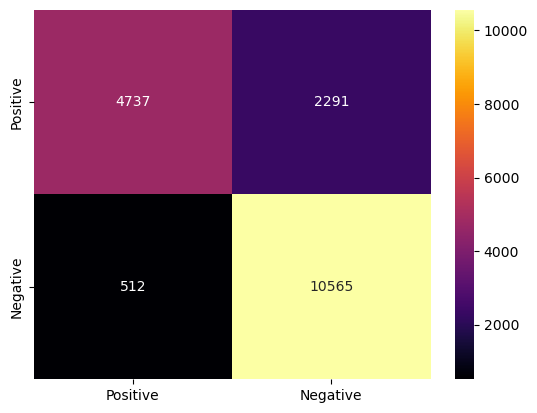

In [30]:
#create a classifier
cls_poly = svm.SVC(kernel="poly")
#train the model
cls_poly.fit(X_train,y_train)
#predict the response
pred_poly = cls_poly.predict(X_test)


print("acuracy:", metrics.accuracy_score(y_test,y_pred=pred_poly))
#precision score
print("precision:", metrics.precision_score(y_test,y_pred=pred_poly))
#recall score
print("recall" , metrics.recall_score(y_test,y_pred=pred_poly))
print(metrics.classification_report(y_test, y_pred=pred_poly))
CM_poly = confusion_matrix(y_test, pred_poly)

print('Confusion matrix\n\n', CM_poly)

print('\nTrue Positives(TP) = ', CM_poly[0,0])

print('\nTrue Negatives(TN) = ', CM_poly[1,1])

print('\nFalse Positives(FP) = ', CM_poly[0,1])

print('\nFalse Negatives(FN) = ', CM_poly[1,0])

CM_poly_df = pd.DataFrame(data = CM_poly, columns=['Positive', 'Negative'], 
                                 index=['Positive', 'Negative'])

sns.heatmap(CM_poly_df, annot = True, fmt='d', cmap='inferno')

In [27]:
# # # data points
# # X = [[0.1,2.3],
# #      [-1.5, 2.5],
# #      [2.0, -4.3]]

# # # labels
# # y = [0,1,0]

# # # nonlinear transformation
# # fX = [(x[0],x[1],[x[0]**2 + x[1]**2]) for x in X]

# # # fit
# # svm.SVC().fit(fX,y)


# X = np.array(
#     [
#         [0.4, -0.7],
#         [-1.5, -1.0],
#         [-1.4, -0.9],
#         [-1.3, -1.2],
#         [-1.1, -0.2],
#         [-1.2, -0.4],
#         [-0.5, 1.2],
#         [-1.5, 2.1],
#         [1.0, 1.0],
#         [1.3, 0.8],
#         [1.2, 0.5],
#         [0.2, -2.0],
#         [0.5, -2.4],
#         [0.2, -2.3],
#         [0.0, -2.7],
#         [1.3, 2.1],
#     ]
# )

# y = np.array([0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1])

# # Plotting settings
# fig, ax = plt.subplots(figsize=(4, 3))
# x_min, x_max, y_min, y_max = -3, 3, -3, 3
# ax.set(xlim=(x_min, x_max), ylim=(y_min, y_max))

# # Plot samples by color and add legend
# scatter = ax.scatter(X[:, 0], X[:, 1], s=150, c=y, label=y, edgecolors="k")
# ax.legend(*scatter.legend_elements(), loc="upper right", title="Classes")
# ax.set_title("Samples in two-dimensional feature space")
# _ = plt.show()

In [28]:
# from sklearn.inspection import DecisionBoundaryDisplay




# def plot_training_data_with_decision_boundary(kernel):
#     # Train the SVC
#     clf = svm.SVC(kernel=kernel, degree = 2, gamma=2,coef0 = 1.0).fit(X, y)

#     # Settings for plotting
#     _, ax = plt.subplots(figsize=(4, 3))
#     x_min, x_max, y_min, y_max = -3, 3, -3, 3
#     ax.set(xlim=(x_min, x_max), ylim=(y_min, y_max))

#     # Plot decision boundary and margins
#     common_params = {"estimator": clf, "X": X, "ax": ax}
#     DecisionBoundaryDisplay.from_estimator(
#         **common_params,
#         response_method="predict",
#         plot_method="pcolormesh",
#         alpha=0.3,
#     )
#     DecisionBoundaryDisplay.from_estimator(
#         **common_params,
#         response_method="decision_function",
#         plot_method="contour",
#         levels=[-1, 0, 1],
#         colors=["k", "k", "k"],
#         linestyles=["--", "-", "--"],
#     )

#     # Plot bigger circles around samples that serve as support vectors
#     ax.scatter(
#         clf.support_vectors_[:, 0],
#         clf.support_vectors_[:, 1],
#         s=250,
#         facecolors="none",
#         edgecolors="k",
#     )
#     # Plot samples by color and add legend
#     ax.scatter(X[:, 0], X[:, 1], c=y, s=150, edgecolors="k")
#     ax.legend(*scatter.legend_elements(), loc="upper right", title="Classes")
#     ax.set_title(f" Decision boundaries of {kernel} kernel in SVC")

#     _ = plt.show()


In [29]:
# plot_training_data_with_decision_boundary("poly")
